<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/Keras(1128_%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part3. 케라스(Keras)

---



## 01.  딥러닝 준비

 케라스 API 
- 고수준의 딥러닝 라이브러리
- 다른 딥러닝 라이브러리와 가장 큰 차이는 GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용한다는 점



### 1-1. 주요 용어

**1-1-1) 하이퍼파라미터**


- 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정값
- 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지기 때문에 매우 중요
- 하이퍼파리미터 튜닝 : 하이퍼 파라미터의 값을 조절하는 행위


**1-1-2) 과소적합 vs. 과대적합**


예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어지게 됨

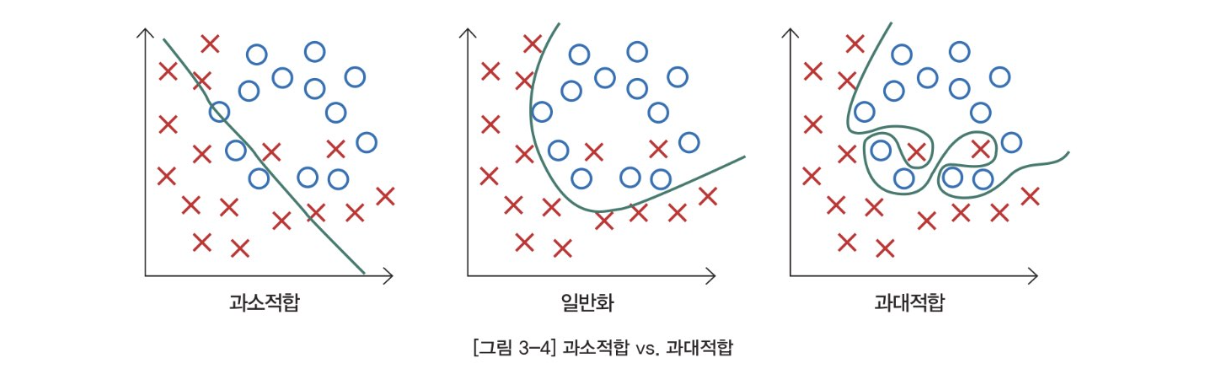

과소적합 : 모델이 충분히 학습되지 않은 경우

과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
- 이 상태에서는 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만, 정작 중요한 예측 데이터에 대한 예측 오차가 발생할 확률이 커짐

**1-1-3) 에포크**

- 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정
- 데이터셋을 전부 학습에 사용하는 1회 훈련 루프가 1 epoch

**1-1-4) 손실함수**

- 예측값과 정답값의 차이 또는 오차
- 지도 학습 분류 문제
  - 이진 분류 
    - 손실함수 : binary_crossentropy
    - 출력층의 활성화 함수 : sigmoid
  - 다중 분류
    - 대상이 되는 클래스가 one-hot vecotr인 경우 손실함수 : categorical_crossentropy
    - 대상이 되는 클래스 레이블값으로 표현 되었으면 손실함수 : sparse_categorical_crossentropy
    -  출력층의 활성화 함수 : softmax
- 회귀 모델 : 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber) 등이 사용됨

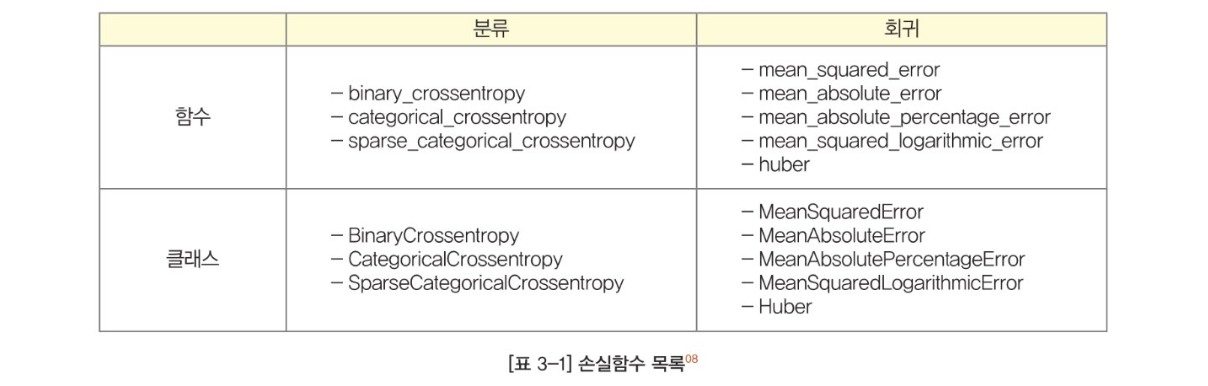

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

**1-1-5) 경사하강법**

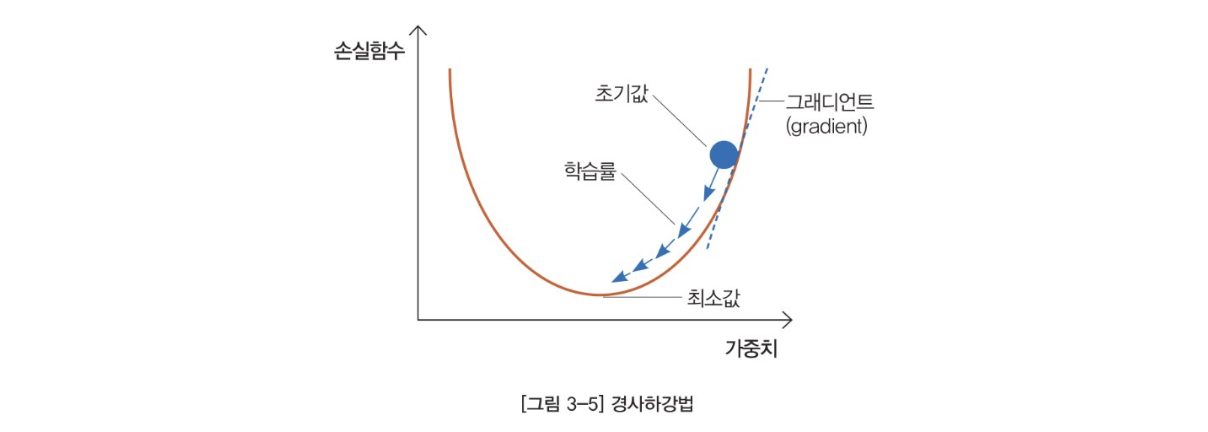

- 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법
- 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음

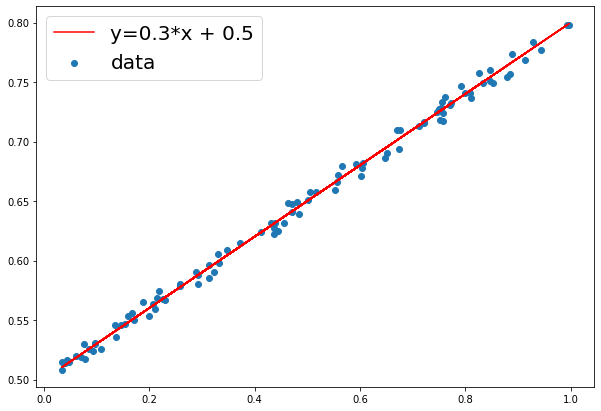

w : 0.3, b:0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=0.1):
    x = np.random.rand(size)
    y = w*x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) 
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y={w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w : {w}, b:{b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

- 약간의 노이즈가 추가됨

In [9]:
# 최대 반복 횟수
num_epoch =1000

# 학습률 
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w*x + b
    
    # loss function 정의
    error = 0.5*((y_hat-y)**2).sum()
    if error < 0.005:
        break 
    # Gradient 미분 계산 
    w = w-learning_rate * ((y_hat-y)*x).sum()
    b = b-learning_rate * (y_hat-y).sum()
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print('{0:2} w = {1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))
        
print('----' * 15)
print('{0:2} w = {1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch,w,b, error))

 0 w = 0.69672, b=0.29289 error=0.71491
 5 w = 0.63856, b=0.32892 error=0.50390
10 w = 0.58696, b=0.35502 error=0.36307
15 w = 0.54317, b=0.37713 error=0.26171
20 w = 0.50602, b=0.39588 error=0.18875
25 w = 0.47450, b=0.41180 error=0.13624
30 w = 0.44775, b=0.42530 error=0.09844
35 w = 0.42507, b=0.43675 error=0.07124
40 w = 0.40582, b=0.44647 error=0.05166
45 w = 0.38949, b=0.45471 error=0.03756
50 w = 0.37564, b=0.46170 error=0.02742
55 w = 0.36388, b=0.46764 error=0.02012
60 w = 0.35391, b=0.47267 error=0.01486
65 w = 0.34545, b=0.47694 error=0.01108
70 w = 0.33827, b=0.48057 error=0.00836
75 w = 0.33219, b=0.48364 error=0.00640
------------------------------------------------------------
80 w = 0.32799, b=0.48576 error=0.00499


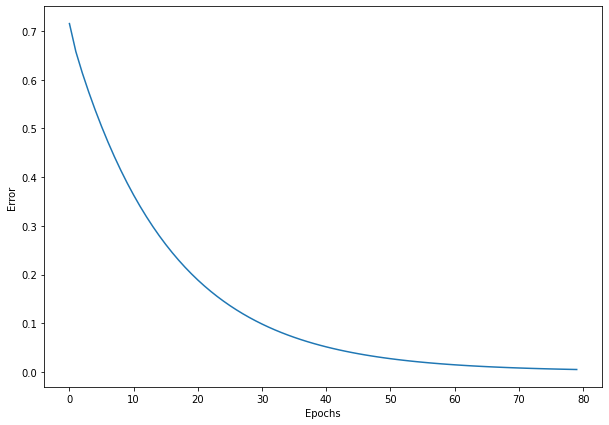

In [10]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2. 딥러닝 프로레스

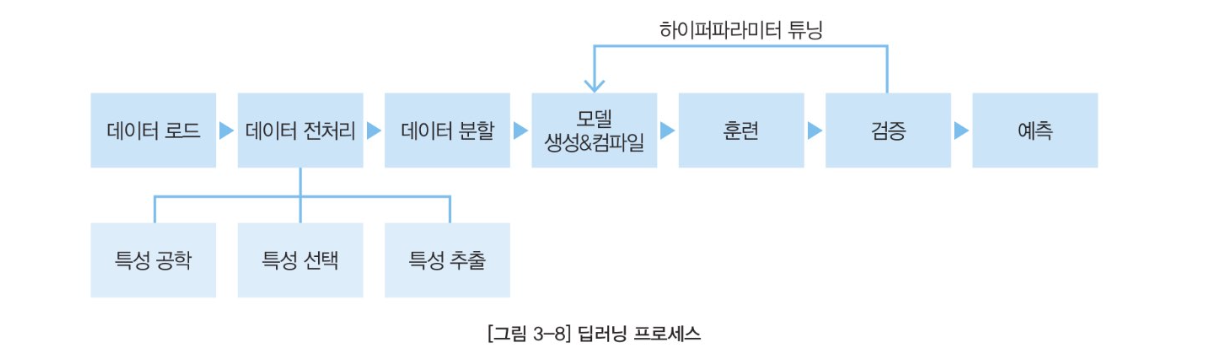

**1-2-1) 데이터 전처리**

- 데이터를 모델에 주입하기 전에 가공하는 단계


**1-2-2) 모델 생성**

- 모델의 구조를 정의하고 생성하는 단계
- 순차적인 구조의 모델 : Sequential API로 구현
- 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델 : Functional API 혹은 Model subclassing

**1-2-3) 모델 컴파일**

- 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
- 모델 인스턴스에 compile() 메소드를 적용

**1-2-4) 모델 훈련**
- fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달

**1-2-5) 모델 검증**
- 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산

**1-2-6) 모델 예측**
- 훈련과 검증이 완련된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환

## 02. 단순 신경망 훈련

### 2-1. 선형회귀

- 회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
- 단순선형회귀 모형 : 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음
  - y= wx+b
    - w : 가중치 
    - b : 편향

### 2-2. 뉴런

- 인공 신경망 모델을 구성하는 하나의 신경
- 노드라고도 불림
- 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
- 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨

### 2-3. Dense 레이어

- 심층 신경망을 구성하는 가장 기본 레이어
- 각 레이와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고 부름

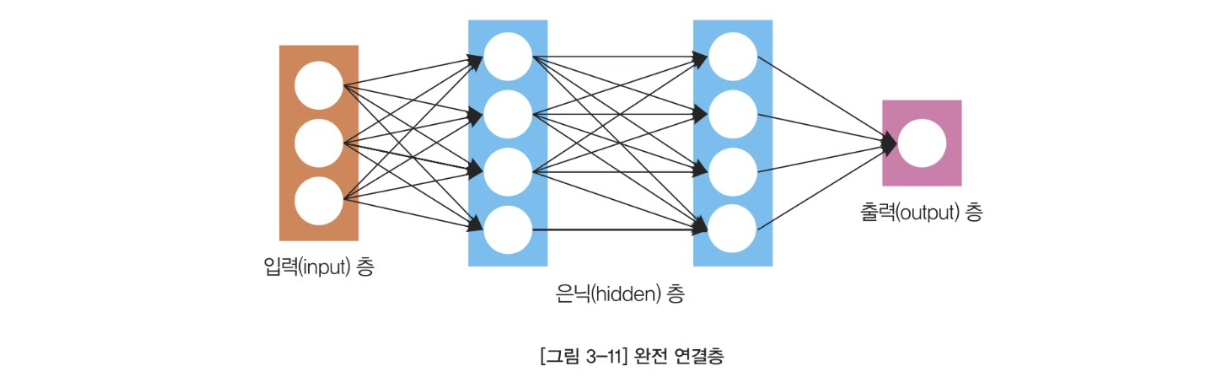

In [11]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4. 데이터셋 만들기

In [12]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


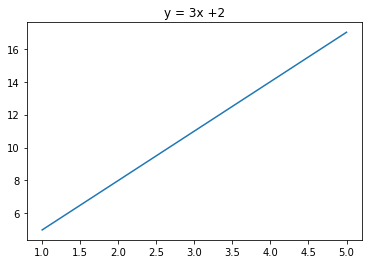

In [13]:
#시각화
plt.plot(x,y)
plt.title('y = 3x +2')
plt.show()

### 2-5. Sequential API

- 층을 이어붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 갖는다
- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있음


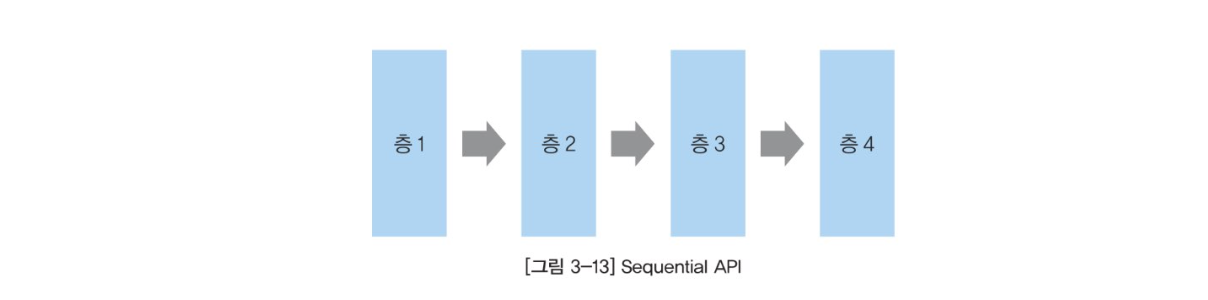

**2-5-1) 모델 구조**

1) 파이썬 리스트 형태로 여러 개의 층을 입력, 대괄호 안에 쉼표로 구분하여 층을 쌓음

In [14]:
# Dense 레이어 3개를 갖는 모델 생성
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

2) add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식

In [15]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**2-5-2) 입력 데이터 형태**



In [19]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

**2-5-3) 단순선형회귀모델 정의**

In [20]:
# 단순선형회귀모델 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # 입력변수는 X 1개만 존재
])

### 2-6. 모델 요약

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params : 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
- Non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수 

### 2-7. 컴파일

In [22]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [23]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [25]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [26]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

### 2-8. 훈련

In [27]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 912ms/step - loss: 44.4454 - mae: 6.3444
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 26.0654 - mae: 4.9017
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 15.3533 - mae: 3.8002
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 9.1097 - mae: 2.9592
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 5.4701 - mae: 2.3169


In [28]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # 입력변수는 X 1개만 존재
])

# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

# 훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 375ms/step - loss: 165.0455 - mae: 11.9586
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 96.2556 - mae: 9.1685
Epoch 3/1200
1/1 [==============================] - 0s 8ms/step - loss: 56.1677 - mae: 7.0385
Epoch 4/1200
1/1 [==============================] - 0s 8ms/step - loss: 32.8060 - mae: 5.4124
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 19.1915 - mae: 4.1709
Epoch 6/1200
1/1 [==============================] - 0s 9ms/step - loss: 11.2571 - mae: 3.2230
Epoch 7/1200
1/1 [==============================] - 0s 7ms/step - loss: 6.6328 - mae: 2.4993
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 3.9375 - mae: 1.9467
Epoch 9/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.3664 - mae: 1.5247
Epoch 10/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.4503 - mae: 1.2024
Epoch 11/1200
1/1 [==============================] - 0s 8ms

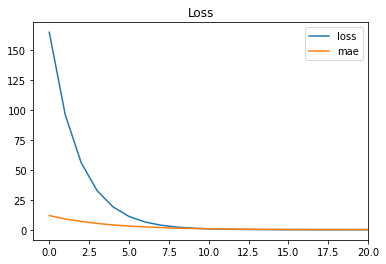

In [29]:
# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9. 검증


In [30]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 239ms/step - loss: 5.4104e-05 - mae: 0.0063


[5.4104195442050695e-05, 0.006313609890639782]

### 2-10. 예측

In [31]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 122ms/step


array([[32.030514]], dtype=float32)

## 03. 심층 신경망으로 이미지 분류 

### 3-1. 케라스 내장 데이터셋 로드

In [39]:
# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [40]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
# 로드된 데이터셋 확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


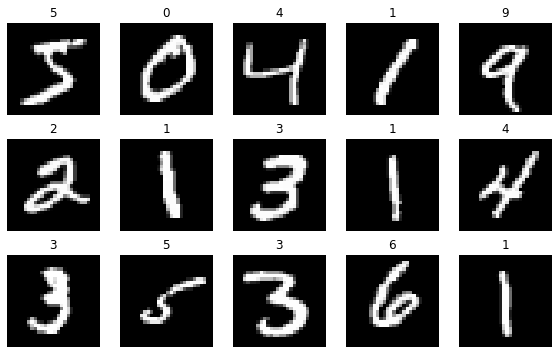

In [42]:
# 데이터 시각화
# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2. 데이터 전처리

In [43]:
# x_train 배열의 데이터 확인
x_train[0,10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [44]:
# 픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최댓값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [45]:
# test set에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [46]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0,10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3. Flatten 레이어

- 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없다 -> 반드시 1차원 배열이 들어가야 함
- 1차원으로 전처리하여 주입

In [47]:
print(f'변경 전 shape : {x_train.shape}')
print(f'1D로 shape 변경 후 : {x_train.reshape(60000,-1).shape}')

변경 전 shape : (60000, 28, 28)
1D로 shape 변경 후 : (60000, 784)


In [49]:
print(f"변경 전 shape: {x_train.shape}")

# Flatten 레이어 적용 후 shape 확인
print(f"Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4. 활성화 함수

- 입력을 비선형 출력으로 변환해주는 함수 
- 자주 사용되는 활성화 함수 : 시그모이드(sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent or tanh), ReLU, Leaky ReLU

In [50]:
# Dense 레이어에 Relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [51]:
# Dense 레이어에 Relu 활성화 함수 레이어를 별도 적용한 경우
# Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5. 입력과 출력

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

In [55]:
# 출력층 노드 =1 인 경우 -> sigmoid 활성화 함수 적용
tf.keras.layers.Dense(1, activation='sigmoid')
# 출력층의 노드 개수가 2개 이상 -> softmax 활성화 함수 적용
tf.keras.layers.Dense(1, activation='softmax')

### 3-6. 손실함수 

In [54]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss="binary_crossentropy")

In [56]:
# y가 원핫 벡터인 경우 
# [ 0..0..0.. 0.. 0.. 1.. 0.. 0.. 0.. 0..]
model.compile(loss="categorical_crossentropy")
# y가 원핫 벡터가 아닌 경우 
# [5]
model.compile(loss="sparse_categorical_crossentropy")

### 3-7. 옵티마이저

- SGD
- RMSprop
- A d a m
- Adadelta
- Adagrad 
- Adamax
- AdaGrad 
- RMSProp
- AdaDelta
- Nadam 
- Ftrl

In [57]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')              

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8. 평가지표

In [58]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [59]:
# 문자열로 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9. 훈련

In [64]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2236 - accuracy: 0.9337 - val_loss: 0.1095 - val_accuracy: 0.9660
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0920 - accuracy: 0.9713 - val_loss: 0.0813 - val_accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0963 - val_accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0464 - accuracy: 0.9845 - val_loss: 0.0818 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0796 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0979 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0775 - val_ac

### 3-10. 평가

In [65]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1001 - accuracy: 0.9773
검증 셋 정확도 0.9772999882698059


### 3-11. 예측

In [66]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [67]:
# 예측 결과 출력
predictions[0]

array([2.8908529e-12, 3.9052321e-09, 5.8208294e-10, 7.9519777e-09,
       1.8926261e-09, 3.5103238e-12, 1.3564966e-14, 9.9999994e-01,
       1.7597104e-11, 4.9867954e-09], dtype=float32)

In [68]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
# argmax를 활용하여 가장 높은 확률 값을 가지는 클래스 결과 확인
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


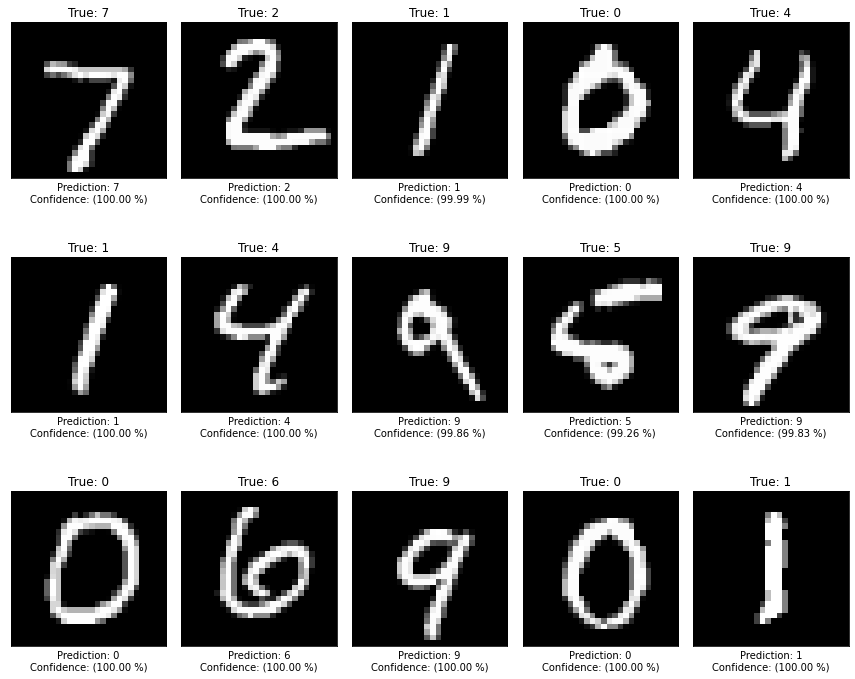

In [69]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"True: {y_true}")
  ax.set_xlabel(f"Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)")
plt.tight_layout()
plt.show()

## 04. 모델 세부 설정

In [71]:
# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 로드된 데이터셋 확인
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)
# 데이터 정규화
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


### 4-1. 초기값 설정

In [72]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [73]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer="he_normal", activation="relu")
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation="relu")
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


- glorot_normal', glorot_uniform': 글로럿초기화(Xavier초기화) 
- 'lecun _normal', 'lecun_uniform' : Yann Lecun 초기화
- 'he _normal', 'he_uniform' :He 초기화
- 'random_normal', 'random_uniform'  : 정규분포, 연속균등 분포 초기화

### 4-2. 규제

In [74]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_26',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

- 모델이 과대적합하는 것을 방지해 주기 위해 모델을 구성하는 레이어마다 규제를 적용 
- L1, L2

In [77]:
# l1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 4-3. 드롭아웃

- 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어
- 노드의 일부 신호를 임의로 삭제하게 되면 모델이 쉽게 과대적합되는 것을 방지할 수 있음
- 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용

In [78]:
# Dropout 25% 비율 적용(25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4. 배치 정규화

- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화
- 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음

In [85]:
# model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [86]:
# model_B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                     

### 4-5. 활성화 함수

In [82]:
# LeakyReLu 기본 설정
tf.keras.layers.LeakyReLU() 

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2) 

In [87]:
# model_C: Dense + BatchNorm + LeakyReLu(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_c.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                     

In [88]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

#Model B
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

#Model C
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.9160 - val_loss: 0.1516 - val_accuracy: 0.9554
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1411 - accuracy: 0.9579 - val_loss: 0.1144 - val_accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1046 - accuracy: 0.9676 - val_loss: 0.1067 - val_accuracy: 0.9651
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.0964 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0973 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0888 - val_accuracy:

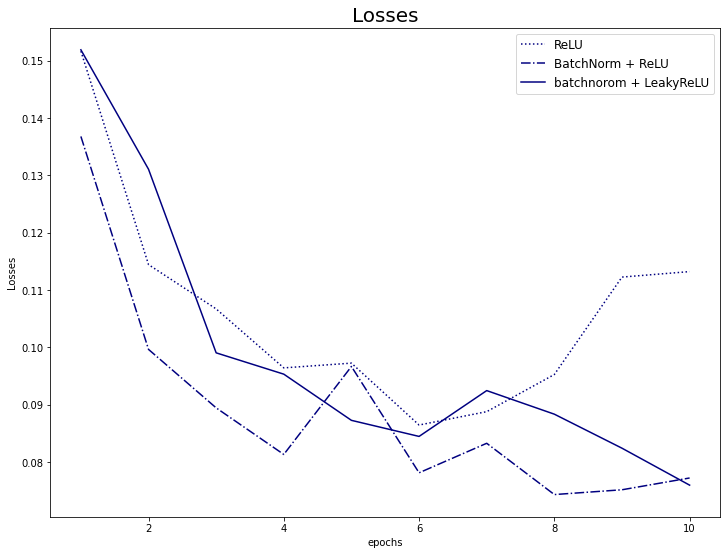

In [89]:
plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='navy', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='navy', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'batchnorom + LeakyReLU'], fontsize=12)
plt.show()